In [1]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt

観測されたデータ。N(5,1)から作られた10個の乱数。

In [2]:
X = np.zeros(10)
for i in range(len(X)):
    X[i] = np.random.normal(5,1)

In [3]:
X

array([ 4.95914268,  4.43815974,  4.91455807,  5.18047386,  5.14188939,
        4.87162379,  5.08660321,  4.96217241,  3.95528298,  6.24190738])

[ベイズ推論]</P>
<p>確率変数$X_1, X_2,..., X_n$が互いに独立に平均がμ、分散が1であるような正規分布に従うとする。</p>
<p>μの事前分布にt分布を仮定する。

<P>１　初期値μ^(0)を決め、t=1とおく。</p>
<p>２　現在μ^(t-1)であるとき、次の点μ^tの候補μ'を$μ'$~ $N(μ^{(t-1)}, r^2)$により発生させて、$$ α(μ^{(t-1)}, μ'|x) = min \{ 1, \frac{π(μ')}{π(μ^{(t-1)})}\}$$とおく。</p>
<p>３　(0, 1)上の一様乱数uを発生させて、$$μ^{(t)}=μ' if u≤α(μ^{(t-1)}, μ'|x)のとき$$ $$μ^{(t)}=u^{(t-1)} if μ^{(t-1)}>α(μ^{(t-1)}, μ'|x)のとき$$とする。</p>
<p>４　tをt+1として２にもどる。

事前分布に自由度5のt分布を仮定する。r^2=0.001とする。

In [28]:
class RWMH:
    def __init__(self, X):
        self.mu = 2
        self.freedom = 5.0
        self.x_var = np.mean(X)
        
    def prior_dist(self, t):
        ft = math.gamma((self.freedom+1.0)/2.0)/(math.sqrt(self.freedom*math.pi)*math.gamma((self.freedom)/2.0))*pow(1+pow(t, 2)/self.freedom, -(self.freedom+1)/2.0)
        return ft
        
    def prop_dist(self):
        self.mu = np.random.normal(self.mu, 0.5)
        return self.mu
    
    def accept(self, mu_new, mu):
        return min([1, self.prior_dist(mu_new)/self.prior_dist(mu)])
    
    def simulate(self):
        mu = np.zeros(110000)
        mu[0] = self.mu
        for i in range(1,110000):
            mu_new = self.prop_dist()
            u = np.random.uniform()
            if u <= self.accept(mu_new, mu[i-1]):
                mu[i] = mu_new
            else:
                mu[i] = mu[i-1]
            self.mu = mu[i] 
        return mu

In [29]:
rwmh = RWMH(X)

In [30]:
mu = rwmh.simulate()

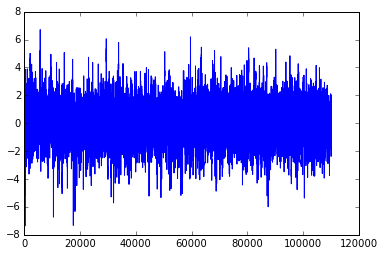

In [31]:
plt.plot(mu)

(array([  3.30000000e+01,   1.93000000e+02,   1.04800000e+03,
          7.03100000e+03,   3.39110000e+04,   4.99250000e+04,
          1.50990000e+04,   2.32600000e+03,   3.84000000e+02,
          5.00000000e+01]),
 array([-7.37112175, -5.96329101, -4.55546028, -3.14762954, -1.73979881,
        -0.33196808,  1.07586266,  2.48369339,  3.89152413,  5.29935486,
         6.7071856 ]),
 <a list of 10 Patch objects>)

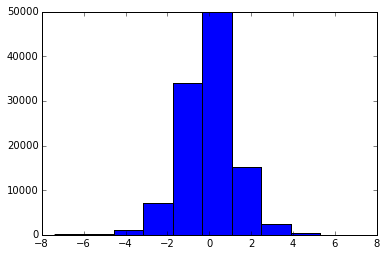

In [32]:
plt.hist(mu)

(array([  270700.,   469793.,   846412.,  1720708.,  2770729.,  1927362.,
         1390430.,   945229.,   450842.,   197795.]),
 array([-0.9992088 , -0.60274931, -0.20628982,  0.19016967,  0.58662916,
         0.98308866,  1.37954815,  1.77600764,  2.17246713,  2.56892662,
         2.96538611]),
 <a list of 10 Patch objects>)

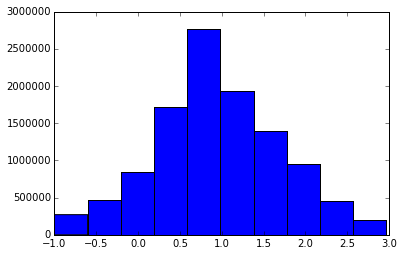

In [16]:
plt.hist(mu[10000:])

In [18]:
mu.mean()

0.93947422729157148

$\mu$の事前分布に無情報事前分布を仮定する。

In [10]:
class RWMH:
    def __init__(self, X):
        self.mu = 5
        self.x_var = np.mean(X)
        
    def prior_dist(self, t):
        ft = np.random.normal(0, 10000)
        return ft
        
    def prop_dist(self):
        self.mu = np.random.normal(self.mu, 0.001)
        return self.mu
    
    def accept(self, mu_new, mu):
        return min([1, self.prior_dist(mu_new)/self.prior_dist(mu)])
    
    def simulate(self):
        mu = np.zeros(11000)
        mu[0] = self.mu
        for i in range(1,11000):
            mu_new = self.prop_dist()
            u = np.random.uniform()
            if u <= self.accept(mu_new, mu[i-1]):
                mu[i] = mu_new
            else:
                mu[i] = mu[i-1]
            self.mu = mu[i] 
        return mu

In [26]:
rwmh = RWMH(X)

In [27]:
mu = rwmh.simulate()

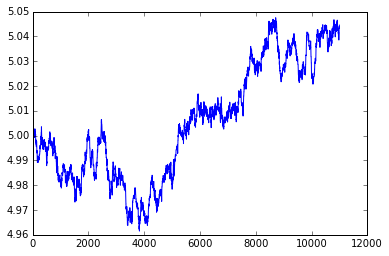

In [28]:
plt.plot(mu)

(array([  502.,   857.,  1945.,  1095.,  1220.,  1742.,   314.,  1111.,
         1121.,  1093.]),
 array([ 4.96151129,  4.97011311,  4.97871493,  4.98731675,  4.99591858,
         5.0045204 ,  5.01312222,  5.02172404,  5.03032586,  5.03892768,
         5.0475295 ]),
 <a list of 10 Patch objects>)

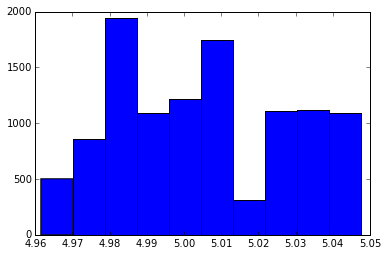

In [29]:
plt.hist(mu)

(array([  502.,   857.,  1831.,   633.,   796.,  1742.,   314.,  1111.,
         1121.,  1093.]),
 array([ 4.96151129,  4.97011311,  4.97871493,  4.98731675,  4.99591858,
         5.0045204 ,  5.01312222,  5.02172404,  5.03032586,  5.03892768,
         5.0475295 ]),
 <a list of 10 Patch objects>)

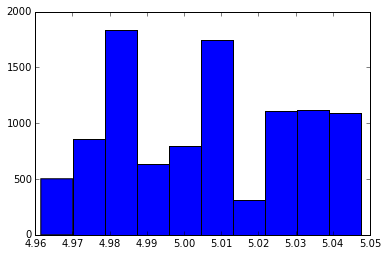

In [30]:
plt.hist(mu[1000:])